In [275]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [276]:
pd.set_option('max_columns', 82)
pd.set_option('max_rows', 100)

pd.get_option('max_columns')
pd.options.display.max_columns

82

In [277]:
pd.get_option('max_rows')
pd.options.display.max_rows

100

# EDA: Exploratory Data Analysis
first look at the data

In [278]:
raw = pd.read_csv(os.path.join('house-prices', 'house-prices.csv'))

My strategy will consist of the following steps:
1. clean the data (w.r.t. errors, inconsistencies and extreme/unrealistic values, missing values and duplicates)
2. split the data in two (validation and training set), trying different combinations. The test set is already subtracted from the data
3. Remove outliers from the training set
4. Feature encoding to both
5. Feature engineering
6. Model fitting (Regularization and Grid search)


In [279]:
raw.shape

(2430, 82)

In [280]:
raw.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,300.0,Unf,0.0,652.0,952.0,GasA,Ex,Y,SBrkr,980,1276,0,2256,0.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000.0,Fin,2.0,554.0,TA,TA,Y,224,54,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1951,1951,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,522.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,216.0,216.0,GasA,TA,Y,SBrkr,1575,0,0,1575,0.0,0.0,1,1,2,1,Gd,5,Typ,1,Gd,Attchd,1951.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,80.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Fa,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,1018.0,Unf,0.0,380.0,1398.0,GasA,Gd,Y,SBrkr,1700,0,0,1700,0.0,1.0,1,1,4,1,Gd,6,Typ,1,Gd,Attchd,1959.0,RFn,2.0,447.0,TA,TA,Y,0,38,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,2fmCon,2.5Unf,7,4,1910,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,925.0,925.0,GasA,TA,N,FuseF,964,925,0,1889,0.0,0.0,1,1,4,2,TA,9,Typ,1,Gd,Detchd,1960.0,Unf,1.0,308.0,TA,TA,N,0,0,264,0,0,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [281]:
raw.sample(20)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
621,140,535152050,20,RL,70.0,8197,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,2003,2009,Gable,CompShg,VinylSd,VinylSd,BrkFace,506.0,Gd,TA,PConc,Gd,TA,No,GLQ,1188.0,Unf,0.0,292.0,1480.0,GasA,Ex,Y,SBrkr,1480,0,0,1480,1.0,0.0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2003.0,RFn,2.0,620.0,TA,TA,Y,252,73,0,0,0,0,NaN,MnPrv,Shed,300,2,2010,WD,Normal,214000
1880,1178,533236090,160,FV,36.0,3951,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,10,5,1998,1999,Gable,CompShg,BrkFace,MetalSd,None,0.0,Ex,TA,PConc,Gd,TA,Mn,BLQ,128.0,GLQ,842.0,0.0,970.0,GasA,Ex,Y,SBrkr,1469,924,0,2393,1.0,0.0,2,1,2,1,Ex,7,Typ,1,TA,Attchd,1998.0,Fin,2.0,846.0,TA,TA,Y,0,90,0,0,94,0,NaN,NaN,NaN,0,2,2008,WD,Normal,345000
1195,1859,533254100,80,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,SLvl,6,7,1976,1994,Hip,CompShg,Plywood,Plywood,BrkFace,360.0,Gd,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,528.0,528.0,GasA,Ex,Y,SBrkr,1094,761,0,1855,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,RFn,2.0,512.0,TA,TA,Y,113,100,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,187000
329,415,527455050,160,RL,24.0,2364,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,2Story,6,5,1978,1978,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,320.0,Unf,0.0,484.0,804.0,GasA,TA,Y,SBrkr,804,744,0,1548,0.0,1.0,2,1,3,1,TA,7,Typ,1,TA,Detchd,1978.0,Unf,2.0,440.0,TA,TA,Y,108,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,147000
2067,1863,534104090,60,FV,NaN,7050,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,738.0,Unf,0.0,319.0,1057.0,GasA,Ex,Y,SBrkr,1057,872,0,1929,1.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2001.0,Fin,2.0,650.0,TA,TA,Y,0,235,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,226000
1013,348,527108070,20,RL,42.0,14892,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,1Story,9,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,160.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1320.0,Unf,0.0,426.0,1746.0,GasA,Ex,Y,SBrkr,1746,0,0,1746,1.0,0.0,2,0,3,1,Ex,7,Typ,2,Gd,Attchd,2006.0,Fin,3.0,758.0,TA,TA,Y,201,39,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,377500
2151,886,908102270,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1964,1999,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,PConc,TA,TA,No,BLQ,637.0,Unf,0.0,849.0,1486.0,GasA,Ex,Y,SBrkr,1486,0,0,1486,1.0,0.0,1,0,3,1,TA,7,Typ,0,NaN,Detchd,1968.0,Fin,2.0,480.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,167000
2184,1484,907425030,120,RM,NaN,4438,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,205.0,Gd,TA,PConc,Gd,TA,Av,GLQ,662.0,Unf,0.0,186.0,848.0,GasA,Ex,Y,SBrkr,848,0,0,848,1.0,0.0,1,0,1,1,Gd,3,Typ,1,Gd,Attchd,2004.0,RFn,2.0,420.0,TA,TA,Y,149,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,149000
369,2146,907252020,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,149.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf

In [282]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2430 non-null   int64  
 1   PID              2430 non-null   int64  
 2   MS SubClass      2430 non-null   int64  
 3   MS Zoning        2430 non-null   object 
 4   Lot Frontage     2010 non-null   float64
 5   Lot Area         2430 non-null   int64  
 6   Street           2430 non-null   object 
 7   Alley            163 non-null    object 
 8   Lot Shape        2430 non-null   object 
 9   Land Contour     2430 non-null   object 
 10  Utilities        2430 non-null   object 
 11  Lot Config       2430 non-null   object 
 12  Land Slope       2430 non-null   object 
 13  Neighborhood     2430 non-null   object 
 14  Condition 1      2430 non-null   object 
 15  Condition 2      2430 non-null   object 
 16  Bldg Type        2430 non-null   object 
 17  House Style   

In [283]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2430.0,1.469478e+03,8.432365e+02,1.0,7.492500e+02,1470.5,2.193500e+03,2.930000e+03
PID,2430.0,7.149375e+08,1.887339e+08,526301100.0,5.284770e+08,535454055.0,9.071352e+08,1.007100e+09
MS SubClass,2430.0,5.709259e+01,4.290325e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2010.0,6.920199e+01,2.348699e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2430.0,1.024356e+04,8.353925e+03,1470.0,7.482000e+03,9500.0,1.160450e+04,2.152450e+05
Overall Qual,2430.0,6.088889e+00,1.414621e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2430.0,5.569959e+00,1.116442e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2430.0,1.971167e+03,3.020793e+01,1875.0,1.954000e+03,1973.0,2.000000e+03,2.010000e+03
Year Remod/Add,2430.0,1.984239e+03,2.075116e+01,1950.0,1.966000e+03,1993.0,2.003000e+03,2.010000e+03
Mas Vnr Area,2410.0,1.019954e+02,1.766117e+02,0.0,0.000000e+00,0.0,1.647500e+02,1.600000e+03


In [284]:
raw.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [285]:
raw['Fireplace Qu'].value_counts()

Gd    620
TA    477
Fa     67
Po     42
Ex     38
Name: Fireplace Qu, dtype: int64

I will define different list for nominal, ordinal, continuous and discrete features and analyse each group separetely.

In [286]:
nominal = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config','Neighborhood',
           'Condition 1', 'Condition 2','Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
           'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 
           'Sale Type', 'Sale Condition']

In [287]:
ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
           'Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 
           'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 
           'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']

In [288]:
continuous = ['Lot Frontage','Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
              '1st Flr SF','2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
              'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

In [289]:
discrete = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath','Bsmt Half Bath', 'Full Bath', 'Half Bath', 
            'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
            'Mo Sold', 'Yr Sold']

In [290]:
target = ['SalePrice']

In [291]:
identifiers = ['PID', 'Order']

In [292]:
len(continuous)

19

In [293]:
len(ordinal)

23

In [294]:
len(nominal)

23

In [295]:
len(discrete)

14

In [296]:
len(target)

1

In [297]:
len(ordinal) + len(nominal) + len(discrete) + len(continuous) + len(target) + len(identifiers)

82

In [298]:
raw[discrete].head()

,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Mo Sold,Yr Sold
0,2000,2000,0.0,0.0,2,1,4,1,8,1,2000.0,2.0,4,2009
1,1951,1951,0.0,0.0,1,1,2,1,5,1,1951.0,2.0,6,2006
2,1970,1970,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,1,2007
3,1959,1959,0.0,1.0,1,1,4,1,6,1,1959.0,2.0,4,2010
4,1910,1950,0.0,0.0,1,1,4,2,9,1,1960.0,1.0,1,2007


# EDA
## 1. Cleaning the data

### 1| Typos and inconsistencies

In [299]:
raw[discrete].describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
Year Built,2430.0,1971.0,30.0,1875.0,1954.0,1973.0,2000.0,2010.0
Year Remod/Add,2430.0,1984.0,21.0,1950.0,1966.0,1993.0,2003.0,2010.0
Bsmt Full Bath,2428.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
Bsmt Half Bath,2428.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Full Bath,2430.0,2.0,1.0,0.0,1.0,2.0,2.0,4.0
Half Bath,2430.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
Bedroom AbvGr,2430.0,3.0,1.0,0.0,2.0,3.0,3.0,8.0
Kitchen AbvGr,2430.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0
TotRms AbvGrd,2430.0,6.0,2.0,2.0,5.0,6.0,7.0,15.0
Fireplaces,2430.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0


In [300]:
raw.loc[raw['Garage Yr Blt'] == 2207, :]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2219,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial,267300


This record refers to a new house built on 2007 so probably this typo refers to the same year the house was sold, since it is new.

In [301]:
raw.loc[raw['Garage Yr Blt'] == 2207, 'Garage Yr Blt'] = 2007

In [302]:
raw[continuous].describe(percentiles = [0.1, 0.25, 0.50, 0.75, 0.90]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
Lot Frontage,2010.0,69.201990,23.486988,21.0,43.0,58.0,68.0,80.00,95.0,313.0
Lot Area,2430.0,10243.557613,8353.925254,1470.0,4897.3,7482.0,9500.0,11604.50,14365.1,215245.0
Mas Vnr Area,2410.0,101.995436,176.611699,0.0,0.0,0.0,0.0,164.75,323.1,1600.0
BsmtFin SF 1,2429.0,443.944422,457.453649,0.0,0.0,0.0,375.0,737.00,1053.6,5644.0
BsmtFin SF 2,2429.0,51.073693,172.143522,0.0,0.0,0.0,0.0,0.00,136.4,1526.0
Bsmt Unf SF,2429.0,556.480856,439.650118,0.0,46.0,216.0,462.0,799.00,1200.6,2336.0
Total Bsmt SF,2429.0,1051.498971,444.690012,0.0,600.0,794.0,990.0,1299.00,1612.4,6110.0
1st Flr SF,2430.0,1159.845267,393.097610,334.0,747.0,880.5,1086.0,1387.75,1675.0,5095.0
2nd Flr SF,2430.0,326.672840,419.490754,0.0,0.0,0.0,0.0,698.00,912.0,2065.0
Low Qual Fin SF,2430.0,4.586831,47.216176,0.0,0.0,0.0,0.0,0.00,0.0,1064.0


I observe some extreme values which will be treated later when I handle the outliers.

### 2| Duplicates

I check for duplicate rows:

In [303]:
raw.duplicated(keep = 'first').sum()

0

I check specifically for the columns 'Order' and  'PID' because they are identifiers.

In [304]:
raw.duplicated(['Order']).sum()

0

In [305]:
raw.duplicated(['PID']).sum()

0

### 3| Data Types

In [306]:
raw.dtypes

Order                int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

'MS SubClass' is a categorical feature (nominal) encoded with numerical values with a data type as int64. It has to be changed to string.

In [307]:
raw['MS SubClass'].isna().sum()

0

In [308]:
raw['MS SubClass'] = raw['MS SubClass'].astype('category')

In [309]:
raw['MS SubClass'].dtypes

CategoricalDtype(categories=[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160,
                  180, 190],
                 ordered=False)

In [310]:
raw.dtypes

Order                 int64
PID                   int64
MS SubClass        category
MS Zoning            object
Lot Frontage        float64
Lot Area              int64
Street               object
Alley                object
Lot Shape            object
Land Contour         object
Utilities            object
Lot Config           object
Land Slope           object
Neighborhood         object
Condition 1          object
Condition 2          object
Bldg Type            object
House Style          object
Overall Qual          int64
Overall Cond          int64
Year Built            int64
Year Remod/Add        int64
Roof Style           object
Roof Matl            object
Exterior 1st         object
Exterior 2nd         object
Mas Vnr Type         object
Mas Vnr Area        float64
Exter Qual           object
Exter Cond           object
Foundation           object
Bsmt Qual            object
Bsmt Cond            object
Bsmt Exposure        object
BsmtFin Type 1       object
BsmtFin SF 1        

For the rest of the categorical features I have to handle the missing values first.

### 3| Missing values

In [311]:
raw[continuous].isnull().sum()

Lot Frontage       420
Lot Area             0
Mas Vnr Area        20
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
dtype: int64

In [312]:
raw[discrete].isnull().sum()

Year Built          0
Year Remod/Add      0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Fireplaces          0
Garage Yr Blt     138
Garage Cars         1
Mo Sold             0
Yr Sold             0
dtype: int64

In [313]:
raw[ordinal].isnull().sum()

Lot Shape            0
Utilities            0
Land Slope           0
Overall Qual         0
Overall Cond         0
Exter Qual           0
Exter Cond           0
Bsmt Qual           71
Bsmt Cond           71
Bsmt Exposure       74
BsmtFin Type 1      71
BsmtFin Type 2      72
Heating QC           0
Electrical           1
Kitchen Qual         0
Functional           0
Fireplace Qu      1186
Garage Finish      138
Garage Qual        138
Garage Cond        138
Paved Drive          0
Pool QC           2418
Fence             1941
dtype: int64

In [314]:
raw[nominal].isnull().sum()

MS SubClass          0
MS Zoning            0
Street               0
Alley             2267
Land Contour         0
Lot Config           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        20
Foundation           0
Heating              0
Central Air          0
Garage Type        136
Misc Feature      2340
Sale Type            0
Sale Condition       0
dtype: int64

In [315]:
(raw.isnull().mean().round(3)*100).sort_values(ascending = True)

Order               0.0
Bsmt Unf SF         0.0
Total Bsmt SF       0.0
Sale Condition      0.0
Heating QC          0.0
Central Air         0.0
Electrical          0.0
1st Flr SF          0.0
2nd Flr SF          0.0
Low Qual Fin SF     0.0
Gr Liv Area         0.0
Full Bath           0.0
Half Bath           0.0
Bedroom AbvGr       0.0
Kitchen AbvGr       0.0
Kitchen Qual        0.0
TotRms AbvGrd       0.0
Functional          0.0
Sale Type           0.0
Yr Sold             0.0
Mo Sold             0.0
Misc Val            0.0
Pool Area           0.0
Screen Porch        0.0
BsmtFin SF 2        0.0
3Ssn Porch          0.0
Open Porch SF       0.0
Wood Deck SF        0.0
Paved Drive         0.0
Garage Area         0.0
Garage Cars         0.0
Fireplaces          0.0
Enclosed Porch      0.0
BsmtFin SF 1        0.0
Heating             0.0
SalePrice           0.0
Lot Config          0.0
Lot Shape           0.0
Street              0.0
Land Slope          0.0
Neighborhood        0.0
Lot Area        

I decide to drop the columns ['Fence', 'Alley', 'Misc Feature', 'Pool QC'] because they have more than 79% of missing values.

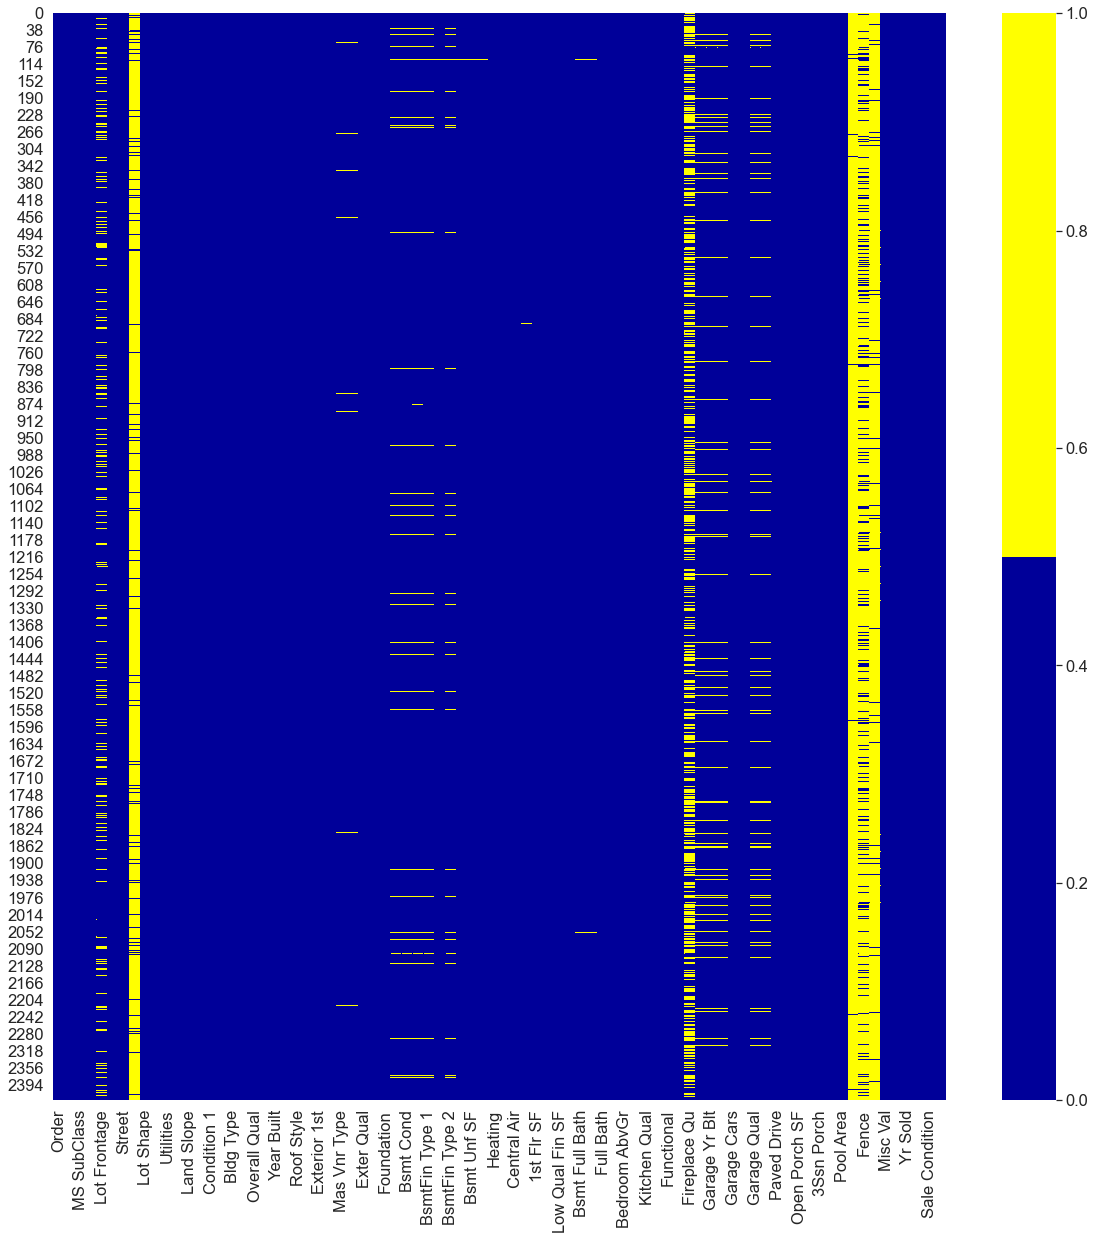

In [316]:
colors = ['#000099', '#ffff00']
# yellow for the missing values, blue for the nonmissing

fig, ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(raw.isnull(), cmap = sns.color_palette(colors))
# yellow for the missing values, blue for the nonmissingg, ax = plt.subplots(figsize=(20,20)) 


I decide to drop the columns ['Fence', 'Alley', 'Misc Feature', 'Pool QC'] because they have more than 79% of missing values. I will also drop the column 'Fireplace Qu'  because it has about 50% missimg values and out of intuition the quality of the fireplace cannot be that determining for the total house price.

In [317]:
raw.drop( columns =  ['Fence', 'Alley', 'Misc Feature', 'Pool QC'], axis = 1, inplace = True)

In [318]:
raw.shape

(2430, 78)

In [319]:
raw[raw[['Garage Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].isnull().any(axis = 1)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
104,1342,903230120,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,Abnorml,79000
1565,2237,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,0,3,2007,WD,Alloca,150909


  I observe that the variable with order id 1342 has missing values on the features 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF' therefore I will fill them with 0. The thinking behind this decision is that there is no data about the Basement so I treat it as if there is no Basement at all.m

In [320]:
raw[['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']] = raw[['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].fillna(0)

In [321]:
raw[['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].isna().sum()

BsmtFin SF 1     0
BsmtFin SF 2     0
Bsmt Unf SF      0
Total Bsmt SF    0
dtype: int64

In [225]:
raw[raw[['Garage Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].isnull().any(axis = 1)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1565,2237,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,0,3,2007,WD,Alloca,150909


In [226]:
raw.isnull().sum() 

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        420
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         20
Mas Vnr Area         20
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            71
Bsmt Cond            71
Bsmt Exposure        74
BsmtFin Type 1       71
BsmtFin SF 1          0
BsmtFin Type 2       72
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air     

In [227]:
raw[raw['Lot Frontage'].isnull()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,300.0,Unf,0.0,652.0,952.0,GasA,Ex,Y,SBrkr,980,1276,0,2256,0.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000.0,Fin,2.0,554.0,TA,TA,Y,224,54,0,0,0,0,0,4,2009,WD,Normal,236000
13,785,905377130,30,RL,NaN,12342,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961.0,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,0,3,2009,WD,Normal,82500
26,583,534128010,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
34,1611,1007100110,70,I (all),NaN,56600,Pave,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,0,1,2008,WD,Normal,103000
35,2893,916252170,120,RM,NaN,8239,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,1295,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,0,11,2006,WD,Normal,230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,2899,916460070,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,Wood,Gd,TA,Av,GLQ,1136.0,BLQ,116.0,129.0,1381.0,GasA,Ex,Y,SBrkr,1403,0,0,1403,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2000.0,Unf,2.0,470.0,TA,TA,Y,0,173,0,0,0,0,0,10,2006,WD,Normal,202000
2409,2894,916325040,20,RL,NaN,50102,Pave,IR1,Low,AllPub,Inside,Mod,Timber,Norm,Norm,1Fam,1Story,6,5,1958,1958,Gable,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,BLQ,909.0,Unf,0.0,723.0,1632.0,GasA,TA,Y,SBrkr,1650,0,0,1650,1.0,0.0,1,0,2,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,2.0,518.0,TA,TA,Y,0,0,0,0,138,0,0,3,2006,WD,Alloca,250764
2412,2898,916403130,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,2Story,7,5,1990,1991,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Wood,Gd,TA,No,LwQ,1216.0,Unf,0.0,0.0,1216.0,GasA,Ex,Y,SBrkr,1298,1216,0,2514,0.0,0.0,2,1,4,1,TA,8,Typ,0,NaN,Attchd,1990.0,Fin,2.0,693.0,TA,TA,Y,0,0,0,0,0,0,0,4,2006,WD,Normal,250000
2413,2223,909428120,20,RL,NaN,21000,Pave,Reg,Bnk,AllPub,Corn

I will fill the missing values of 'Lot Frontage' with the median of this feature.

In [228]:
raw['Lot Frontage'] = raw['Lot Frontage'].fillna(np.nanmedian(raw['Lot Frontage']))

In [229]:
raw[raw['Lot Frontage'].isnull()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [230]:
np.nanmedian(raw['Lot Frontage'], axis = 0)

68.0

In [231]:
raw.loc[raw['Mas Vnr Type'].isnull(), :]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
66,1841,533208040,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,0,11,2007,New,Partial,199900
83,868,907260030,60,RL,70.0,8749,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Ex,Y,SBrkr,840,885,0,1725,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,RFn,2.0,550.0,TA,TA,Y,0,48,0,0,0,0,0,11,2009,WD,Normal,198500
101,2230,909475070,20,RL,68.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2.0,484.0,TA,TA,Y,0,0,200,0,0,0,0,3,2007,WD,Alloca,200624
159,1123,528462040,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2.0,480.0,TA,TA,Y,0,120,0,0,0,0,0,12,2008,New,Partial,182000
201,518,528458020,20,FV,90.0,7993,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,0,10,2009,New,Partial,225000
270,1784,528435010,20,RL,85.0,9965,Pave,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,Ex,Y,SBrkr,1528,0,0,1528,0.0,0.0,3,2,3,1,Gd,6,Typ,1,TA,Attchd,2007.0,Unf,2.0,480.0,TA,TA,Y,0,228,0,0,0,0,0,9,2007,New,Partial,235876
352,1840,533208030,120,FV,30.0,5330,Pave,IR2,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1550.0,1550.0,GasA,Ex,Y,SBrkr,1550,0,0,1550,0.0,0.0,2,1,2,1,Gd,5,Typ,0,NaN,Attchd,2007.0,Fin,2.0,528.0,TA,TA,Y,0,102,0,0,0,0,0,7,2007,New,Partial,207500
447,1455,907251090,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,0,3,2008,WD,Normal,237000
456,1096,528290090,60,RL,68.0,7750,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,0,4,2008,WD,Normal,176000
457,1752,528250010,80,RL,68.0,11950,Pave,IR

In [232]:
raw[raw['Mas Vnr Type'].isnull()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
66,1841,533208040,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,0,11,2007,New,Partial,199900
83,868,907260030,60,RL,70.0,8749,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Ex,Y,SBrkr,840,885,0,1725,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,RFn,2.0,550.0,TA,TA,Y,0,48,0,0,0,0,0,11,2009,WD,Normal,198500
101,2230,909475070,20,RL,68.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2.0,484.0,TA,TA,Y,0,0,200,0,0,0,0,3,2007,WD,Alloca,200624
159,1123,528462040,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2.0,480.0,TA,TA,Y,0,120,0,0,0,0,0,12,2008,New,Partial,182000
201,518,528458020,20,FV,90.0,7993,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,0,10,2009,New,Partial,225000
270,1784,528435010,20,RL,85.0,9965,Pave,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,Ex,Y,SBrkr,1528,0,0,1528,0.0,0.0,3,2,3,1,Gd,6,Typ,1,TA,Attchd,2007.0,Unf,2.0,480.0,TA,TA,Y,0,228,0,0,0,0,0,9,2007,New,Partial,235876
352,1840,533208030,120,FV,30.0,5330,Pave,IR2,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1550.0,1550.0,GasA,Ex,Y,SBrkr,1550,0,0,1550,0.0,0.0,2,1,2,1,Gd,5,Typ,0,NaN,Attchd,2007.0,Fin,2.0,528.0,TA,TA,Y,0,102,0,0,0,0,0,7,2007,New,Partial,207500
447,1455,907251090,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,0,3,2008,WD,Normal,237000
456,1096,528290090,60,RL,68.0,7750,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,0,4,2008,WD,Normal,176000
457,1752,528250010,80,RL,68.0,11950,Pave,IR

In [233]:
raw[raw['Mas Vnr Area'] == 0]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,68.0,8795,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,300.0,Unf,0.0,652.0,952.0,GasA,Ex,Y,SBrkr,980,1276,0,2256,0.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000.0,Fin,2.0,554.0,TA,TA,Y,224,54,0,0,0,0,0,4,2009,WD,Normal,236000
3,142,535152150,20,RL,70.0,10552,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,1018.0,Unf,0.0,380.0,1398.0,GasA,Gd,Y,SBrkr,1700,0,0,1700,0.0,1.0,1,1,4,1,Gd,6,Typ,1,Gd,Attchd,1959.0,RFn,2.0,447.0,TA,TA,Y,0,38,0,0,0,0,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,2fmCon,2.5Unf,7,4,1910,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,925.0,925.0,GasA,TA,N,FuseF,964,925,0,1889,0.0,0.0,1,1,4,2,TA,9,Typ,1,Gd,Detchd,1960.0,Unf,1.0,308.0,TA,TA,N,0,0,264,0,0,0,0,1,2007,WD,Normal,122000
5,1256,535375160,50,RL,45.0,7506,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,8,1925,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,747.0,747.0,GasA,TA,Y,SBrkr,747,412,0,1159,0.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1932.0,Unf,1.0,288.0,Fa,TA,N,84,0,96,0,0,0,0,5,2008,WD,Normal,114000
6,2637,902100130,70,RM,57.0,9906,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,4,1925,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Fa,N,SBrkr,810,518,0,1328,0.0,0.0,1,0,3,1,TA,8,Typ,0,NaN,Detchd,1940.0,Unf,1.0,210.0,TA,TA,Y,0,172,60,0,0,0,0,9,2006,WD,Family,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,1034,527401130,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,Mn,Unf,0.0,Unf,0.0,896.0,896.0,GasA,TA,Y,SBrkr,896,896,0,1792,0.0,0.0,2,2,4,2,TA,8,Typ,0,NaN,Detchd,1982.0,Unf,2.0,480.0,TA,TA,Y,0,45,0,0,0,0,0,6,2008,WD,Normal,133000
2424,1732,528221030,60,RL,62.0,8857,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,738.0,738.0,GasA,Ex,Y,SBrkr,738,757,0,1495,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,440.0,TA,TA,Y,100,30,0,0,0,0,0,3,2007,New,Partial,171925
2425,764,904301070,90,RL,60.0,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1987,1988,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,Gd,Gd,Gd,GLQ,1200.0,Unf,0.0,0.0,1200.0,GasA,TA,Y,SBrkr,1200,0,0,1200,3.0,0.0,3,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,120,0,0,0,0,0,0,3,2009,WD,Alloca,179000
2426,836,907126010,20,RL,82.0,12464,Pave,IR2,Low,AllPub,Corner,Mod,CollgCr,Norm,No

I observe that when there is a missing values in 'Mas Vnr Area' there is also in 'Mas Vnr Type'. Since there is no information about the Mansion Veneer Type and Area I will consider that there is no Mansion Veneer and therefore will fill the values with 0 and 'None' respectively.

In [234]:
raw['Mas Vnr Area'] = raw['Mas Vnr Area'].fillna(0)

In [235]:
raw['Mas Vnr Type'] = raw['Mas Vnr Type'].fillna('None')

In [236]:
raw['Mas Vnr Area'].isna().sum()

0

In [237]:
raw['Mas Vnr Type'].isna().sum()

0

In [238]:
basement = [            
'Bsmt Qual' ,          
'Bsmt Cond'  ,        
'Bsmt Exposure' ,  
'BsmtFin Type 1',    
'BsmtFin SF 1'  ,      
'BsmtFin Type 2',    
'BsmtFin SF 2' ,       
'Bsmt Unf SF' ,         
'Total Bsmt SF'         
]

In [239]:
raw.loc[(raw['Bsmt Exposure'].isna()) & (raw['Total Bsmt SF'] ), basement ]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
875,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0
1681,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0
1726,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0


For the three above stated cases, I will set the value of 'Bsmt Exposure' to No. The reasoning behind this decision is that in these cases there is Bsmt Type 2 but the Bsmt Exposure is not given.

In [240]:
raw.loc[875, 'Bsmt Exposure'] = 'No'

In [241]:
raw.loc[1681, 'Bsmt Exposure'] = 'No'

In [242]:
raw.loc[1726, 'Bsmt Exposure'] = 'No'

In [243]:
raw.loc[(raw['BsmtFin Type 2'].isna()), basement ]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
35,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
48,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
75,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
104,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
117,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
152,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
176,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
217,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
233,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
234,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


In [244]:
raw.loc[602, basement]

Bsmt Qual           Gd
Bsmt Cond           TA
Bsmt Exposure       No
BsmtFin Type 1     GLQ
BsmtFin SF 1      1124
BsmtFin Type 2     NaN
BsmtFin SF 2       479
Bsmt Unf SF       1603
Total Bsmt SF     3206
Name: 602, dtype: object

It is obvious that fot the entry with index 602 the BsmtFin Type 2 is of type unfinidhed. Therefore I will correct it accordingly.

In [245]:
raw.loc[602, 'BsmtFin Type 2'] = 'Unf'

For all the above cases it is obvious that there is no Basement at all, as Total Bsmt SF = 0. Therefore:

In [246]:
raw[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']] = raw[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']].fillna('NA')

In [247]:
raw[raw['Bsmt Full Bath'].isna()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
104,1342,903230120,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,Abnorml,79000
2056,1498,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,0,7,2008,WD,Normal,284700


I assume that there is no Bathroon at the basement since this information is missing. Therefore:

In [248]:
raw['Bsmt Full Bath']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2425    3.0
2426    1.0
2427    0.0
2428    1.0
2429    0.0
Name: Bsmt Full Bath, Length: 2430, dtype: float64

In [249]:
raw['Bsmt Full Bath'] = raw['Bsmt Full Bath'].fillna(0)
raw['Bsmt Half Bath'] = raw['Bsmt Half Bath'].fillna(0)

In [250]:
raw[raw['Electrical'].isna()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
694,1578,916386080,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,5,2008,WD,Normal,167500


In [251]:
raw['Electrical'].value_counts().sort_values()

Mix         1
FuseP       7
FuseF      38
FuseA     160
SBrkr    2223
Name: Electrical, dtype: int64

Since the majority of the houses have a SBrkr type of electrical installation I will use this value to fill the only missing value of 'Electrical'.

In [252]:
raw['Electrical'] = raw['Electrical'].fillna('SBrkr')

In [253]:
raw.isna().sum()

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
Bsmt Cond             0
Bsmt Exposure         0
BsmtFin Type 1        0
BsmtFin SF 1          0
BsmtFin Type 2        0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air     

In [254]:
garage = ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Yr Sold', 'Sale Type', 'Sale Condition', 'SalePrice', 'Year Built']

In [255]:
raw.loc[raw['Garage Finish'].isna() & (raw['Garage Type'].notnull()), garage]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Yr Sold,Sale Type,Sale Condition,SalePrice,Year Built
1114,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,2008,WD,Normal,160000,1910
1565,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,2007,WD,Alloca,150909,1923


In [256]:
raw['Garage Qual'].value_counts()

TA    2156
Fa     109
Gd      20
Po       5
Ex       2
Name: Garage Qual, dtype: int64

In [257]:
raw['Garage Cond'].value_counts()

TA    2202
Fa      61
Po      14
Gd      13
Ex       2
Name: Garage Cond, dtype: int64

In [258]:
raw['Garage Finish'].value_counts()

Unf    1031
RFn     665
Fin     596
Name: Garage Finish, dtype: int64

In [259]:
raw['Garage Cars'].value_counts()

2.0    1340
1.0     635
3.0     306
0.0     136
4.0      12
Name: Garage Cars, dtype: int64

In [260]:
raw['Garage Area'].median()

478.0

I will fill the missing values for the data entries with index 1114 and 1565 with the most frequent values for the categorical features. I will also assume that the farage was built the same year the house was built.

In [261]:
raw['Garage Yr Blt'].median()

1978.0

In [262]:
raw['Garage Yr Blt'].median()

1978.0

In [263]:

# it does not work:
# raw[1114, ['Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']] = [1978, 'Unf', 'TA', 'TA']

In [264]:
raw.loc[raw['Garage Finish'].isna() & (raw['Garage Type'].notnull()), garage]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Yr Sold,Sale Type,Sale Condition,SalePrice,Year Built
1114,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,2008,WD,Normal,160000,1910
1565,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,2007,WD,Alloca,150909,1923


In [265]:
raw.loc[1114, 'Garage Yr Blt'] = '1910'
raw.loc[1114, 'Garage Finish'] = 'Unf'
raw.loc[1114, 'Garage Qual'] = 'TA'
raw.loc[1114, 'Garage Cond'] = 'TA'

In [266]:
raw.loc[1114, 'Garage Cond']

'TA'

In [267]:
raw.loc[1565, 'Garage Yr Blt'] = '1923'
raw.loc[1565, 'Garage Finish'] = 'Unf'
raw.loc[1565, 'Garage Qual'] = 'TA'
raw.loc[1565, 'Garage Cond'] = 'TA'
raw.loc[1565, 'Garage Area'] = np.nanmedian(raw['Garage Area'])
raw.loc[1565, 'Garage Cars'] = 2

In [268]:
 np.nanmedian(raw['Garage Area'])

478.0

In [269]:
raw[(raw['Garage Yr Blt'].isna()) & (raw['Garage Area'] != 0)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [270]:
raw.loc[raw['Garage Finish'].isna() & (raw['Garage Type'].notnull()), garage]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Yr Sold,Sale Type,Sale Condition,SalePrice,Year Built


In [271]:
raw.loc[raw['Garage Type'].isnull(), garage]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Yr Sold,Sale Type,Sale Condition,SalePrice,Year Built
16,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2008,WD,Normal,99600,1975
48,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2008,WD,Normal,106250,1900
62,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2010,WD,Normal,128950,1959
73,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2010,WD,Normal,94000,1875
76,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2009,WD,Normal,136000,1974
...,...,...,...,...,...,...,...,...,...,...,...,...
2292,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2010,WD,Normal,100000,1965
2308,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2007,WD,Normal,110500,1945
2314,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2010,WD,Normal,76500,1940
2354,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2010,WD,Normal,139000,1971


These cases are cases without Garage (Garage Area = 0.0). Therefore:

In [272]:
raw['Garage Type'] = raw['Garage Type'].fillna('NA')
raw['Garage Finish'] = raw['Garage Finish'].fillna('NA')
raw['Garage Qual'] = raw['Garage Qual'].fillna('NA')
raw['Garage Cond'] = raw['Garage Cond'].fillna('NA')
raw['Garage Cars'] = raw['Garage Cars'].fillna(0)
raw['Garage Area'] = raw['Garage Area'].fillna(0)
raw['Garage Yr Blt'] = raw['Garage Yr Blt'].fillna(0)

The value 'Garage Year Blt' = 0 is a dummy value for the case that no garage was built.

In [273]:
raw['Garage Yr Blt']

0       2000
1       1951
2       1970
3       1959
4       1960
        ... 
2425       0
2426    2000
2427    1979
2428    1966
2429    1954
Name: Garage Yr Blt, Length: 2430, dtype: object

In [274]:
(raw['Garage Yr Blt']).min()

TypeError: '<=' not supported between instances of 'int' and 'str'

### Question:
   Any better idea in how to fill the missing values of the feature 'Garage Yr Blt' for the cases that there was no garage built?

In [ ]:
fireplace = ['Fireplaces', 'Fireplace Qu']

In [ ]:
raw.loc[raw['Fireplace Qu'].isna() & raw['Fireplace Qu'] != 0, fireplace]

I observe that all the missing values of the feature 'Fireplace Qu' correspond to cases of no fireplace: 'Fireplaces' = 0. Therefore I will fill them with NA which stands for 'No fireplace':

In [ ]:
raw['Fireplace Qu'] = raw['Fireplace Qu'].fillna('NA')

In [ ]:
raw.isna().sum().sum()

With the imputation of all the missing values I can set the right data types to the features.

In [ ]:
nominal = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config','Neighborhood',
           'Condition 1', 'Condition 2','Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
           'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 
           'Sale Type', 'Sale Condition']

ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
           'Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 
           'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 
           'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']

continuous = ['Lot Frontage','Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
              '1st Flr SF','2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
              'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

discrete = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath','Bsmt Half Bath', 'Full Bath', 'Half Bath', 
            'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
            'Mo Sold', 'Yr Sold']

target = ['SalePrice']

In [ ]:
raw[continuous].dtypes

In [ ]:
raw[discrete].dtypes

In [ ]:
raw['Garage Yr Blt'] = raw['Garage Yr Blt'].astype('int64')

In [ ]:
raw[discrete].dtypes

I redefine the nominal and ordinal list of features excluding the features that I have droped (too many missing values).

In [ ]:
nominal = ['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config','Neighborhood',
           'Condition 1', 'Condition 2','Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
           'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 
           'Sale Type', 'Sale Condition']

In [ ]:
ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
           'Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 
           'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 
           'Garage Cond', 'Paved Drive']

### 4| Data Types

In [ ]:
I will make all the categorical features(ordinal of nominal) of type 'category'.

In [ ]:
raw[nominal] = raw[nominal].astype('category')

In [ ]:
raw[ordinal] = raw[ordinal].astype('category')

In [ ]:
raw.dtypes

In [ ]:
raw['MS SubClass'].isna().sum()

The feature 'MS SubClass' is a categorical one encoded with numbers.

In [ ]:
raw['MS SubClass'] = raw['MS SubClass'].astype('category')
raw['MS SubClass'].dtypes

I will now check for typos or misspellings in the categorical features

In [ ]:

for col in ordinal:
    print('\n')
    print(raw[col].value_counts().sort_values())
    print('\n')
    

In [ ]:
for col in nominal:
    print('\n')
    print(raw[col].value_counts().sort_values())
    print('\n')

I will also print the unique values for the discrete features, to check for inconsistencies.

In [ ]:
for col in discrete:
    print('\n')
    print(col)
    print(raw[col].unique())
    print('\n')

I observe that some discrete features are of type float instead of integer and I will correct that too.

In [ ]:
raw[discrete].dtypes

In [ ]:
raw[discrete] = raw[discrete].astype('int64')

In [ ]:
raw[discrete].dtypes

### 5| Outliers

In [ ]:
len(continuous)

I will first remove the extreme outliers that indicate potential errors in the values or some exceptional cases.

In [ ]:
continuous[0:15]

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (7, 15))
for feature, ax in zip(raw[['Lot Frontage','Lot Area', 'Gr Liv Area']], axes.ravel()):
    ax.scatter(raw[feature], raw.SalePrice, s = 3)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

By visual inspection we see 4 extreme outliers (mentioned in the accompamying documentation.txt by the author). Two of them have a Sale Price that likely does not represent actual market values and two of them are simply unusual sales (very large houses priced relatively appropriately). I will remove them from the dataset.

I check for __multi-feature outliers__ with respect to two features which hold information about the the Lot of the houses, namely 'Lot Area' and 'Lot Frontage'.

In [ ]:
fig, axes = plt.subplots(figsize = (7,7))
plt.scatter(raw['Lot Frontage'],raw['Lot Area'], alpha = 0.1)

I observe that the extreme outliers are for both features extreme values, an observation strengthen the argument towards removing them.

I will remove the follwing extreme outliers by hand (as seen by observing the graphs in serveral features). By extreme outliers I mean the values that do not follow the distribution of the data. Having said that, they can lead to wrong coefficients during the learning phase (training).

In [ ]:
e_outliers = raw.loc[(raw['Gr Liv Area'] > 4000) | 
                     (raw['Lot Frontage'] > 250) | 
                     (raw['Lot Area'] > 100000) | 
                     (raw['Mas Vnr Area'] > 1400) |
                     (raw['BsmtFin SF 1'] > 3000) |
                     (raw['BsmtFin SF 2'] > 1200) |
                     (raw['Total Bsmt SF'] > 3000) |
                     (raw['1st Flr SF'] > 3000) |
                     (raw['2nd Flr SF'] > 1500) |
                     (raw['Wood Deck SF'] > 1400) |
                     (raw['Enclosed Porch'] > 400)   , :]

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (7, 15))
for feature, ax in zip(raw[[ 'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF',]], axes.ravel()):
    ax.scatter(raw[feature], raw.SalePrice, s = 3)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows = 19, ncols = 1, figsize = (7, 56))
for feature, ax in zip(continuous, axes.ravel()):
    ax.scatter(raw[feature], raw.SalePrice, s = 3)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

In [ ]:
e_outliers = raw.loc[(raw['Gr Liv Area'] > 4000) | 
                     (raw['Lot Frontage'] > 250) | 
                     (raw['Lot Area'] > 100000) | 
                     (raw['Mas Vnr Area'] > 1400) |
                     (raw['BsmtFin SF 1'] > 3000) |
                     (raw['BsmtFin SF 2'] > 1200) |
                     (raw['Total Bsmt SF'] > 3000) |
                     (raw['1st Flr SF'] > 3000) |
                     (raw['2nd Flr SF'] > 1500) |
                     (raw['Wood Deck SF'] > 1400) |
                     (raw['Enclosed Porch'] > 400)   , :]

In [ ]:
e_outliers

In [ ]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (7, 15))
for feature, ax in zip(continuous, axes.ravel()):
    ax.hist(raw[feature], bins = 50)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    plt.tight_layout()

# Notes
You can create an additional binary features like 'Garage_exists' that indicate whether a house has a garage or not, to keep along side the original one. You can then look at the subpopulation of houses that have a garage to determine outliers within that subpopulation only.
When you feed both the binary and the numeric feature to a linear regression the model will assign them a coefficient each. The coefficient for 'Garage_exists' can be interpreted as the additional value due to the existence of a garage, while the coefficient for 'Garage_Area' can be interpreted as the additional value per unit area. Thus this combination allows you more fine tuning.
You can also apply log1p first as it maps the 0 subpopulation to itself and only really transforms the non-zero values.



__Feature engineering__
Regarding polyfit(), You can use PolynomialFeatures to generate the necessary powers for selected features and then collate them with the other untreated features.

__sklearn__
The sklearn mae function does not support a constant value of the median. Therefore, you need to pass an array:

check SelectKBest

__distributions with a lot of zeros - correlation__
When you feed both the binary and the numeric feature to a linear regression the model will assign them a coefficient each. The coefficient for 'Garage_exists' can be interpreted as the additional value due to the existence of a garage, while the coefficient for 'Garage_Area' can be interpreted as the additional value per unit area. Thus this combination allows you more fine tuning.
You can also apply log1p first as it maps the 0 subpopulation to itself and only really transforms the non-zero values.
some variables have a peak of zero values which need to be filtered out before applying z-score.
You mean that they need to be filtered out ONLY for the calculation of the Z-score ?

Is keeping both the "boolean" and the "continuous" column (e.g. "Pool Size", "has_Pool") ok, bc. many of them really have a __high correlation__ (computed the corr-scores… e.g. pool would have corr=0.944… I am afraid, due to construction of the boolean column out of the continuous column, this automatically "happens"…), and all the input features ideally should rather be "independent" (not correlated)?
Yes for pool the correlation is quite high due to the very low number of non-zero values. For the other variables (garage, porch, …) correlation should not be too high.
From a theoretical perspective the above would not be ideal but as we have seen we can use regularization to deal with features that are nearly collinear.


In [ ]:
len(e_outliers)

In [ ]:
raw_filtered = raw.drop(e_outliers.index, axis = 0)

In [ ]:
raw.shape

In [ ]:
raw_filtered.shape

In [ ]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (7, 15))
for feature, ax in zip(continuous, axes.ravel()):
    ax.hist(raw_filtered[feature], bins = 50)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    plt.tight_layout()

In [ ]:
df_numerical = raw_filtered._get_numeric_data()

In [ ]:
f = pd.melt(raw_filtered, value_vars = raw_filtered[continuous])
f

In addition to the previous plots I will plot the kernel density estimation (with normalized histograms, suitably smoothed) for all the numerical features. The bandwidth (window width) of the kernel changes its shape.

In [ ]:
sns.set(font_scale=1.5) 
g = sns.FacetGrid(f, col = 'variable', col_wrap = 3, sharex = False, sharey = False, height = 4, aspect = 1.5)
g = g.map(sns.distplot, 'value', hist = True, kde_kws = {'bw': 1.5}, rug = True)

# sns.distplot(x, fit=norm, kde=False)

Reference: https://towardsdatascience.com/creating-python-functions-for-exploratory-data-analysis-and-data-cleaning-2c462961bd71

I also observe that for some features (e.g. Pool Area) exhibit distributions with a lot of points being zero and the rest of the points exhibit some other distribution. this implies the coexistence of two different subpopulations: one with a Pool and the other without a Pool.

For these cases I will introduce a binary parameter (Pool_exists: Yes/No) that indicates whether the house has a pool or not. I will then look at the subpopulation of houses that have a Pool, examine the distribution of that polupation and flag outliers whithin this subpopulation.

As mentioned in the comments when we feed both the binary and the numeric feature to a linear regression, the model will assign them a coefficient each. The coefficient for 'Pool exists' can be interpreted as the additional value due to the existence of a pool, while the coefficient for 'Pool Area' can be interpreted as the additional value per unit area. Thus this combination allows you more fine tuning.

__Later:__
1. Test for normality
from the density functions and the normallized histograms of the above plots I observe that none of the distributions seem to follow the normal distribution or could be considered normal in the first place. __test for normality?__ Kurtosis

2. You can also apply log1p first as it maps the 0 subpopulation to itself and only really transforms the non-zero values.

For the features: 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', '2nd Flr SF','Wood Deck SF',
    'Open Porch SF', 'Enclosed Poch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
    'Garage Area'. 
    I will introduce the following boolean variables:

['Pool exists',
'Garage exists',
'Wood Desk exists',
'Mas Vnr exists',
'Oper Porch exists',
'Enclosed Porch exists',
'Screen Porch exists',
'Misc Val exists',
'3Ssn Porch exists',
'BsmtFin1 exists',
'BsmtFin2 exists',
'2nd Flr exists']


I will now create the binary (not boolean) features. The boolean features (bool() with values False/True) become binary casting the type 'int64'.

In [ ]:
sub_pops = ['Pool Area', 'Garage Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', '2nd Flr SF','Wood Deck SF',
    'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',  'Misc Val']

In [ ]:
# or alternatively:
# raw_filtered['Pool exists1']= [0 if x == 0 else 1 for x in raw_filtered['Pool Area']] 
raw_filtered['Pool exists'] = raw_filtered.apply(lambda row: bool(row['Pool Area'] > 0), axis = 1).astype('int64')
raw_filtered['Garage exists'] = raw_filtered.apply(lambda row: bool(row['Garage Area'] > 0), axis = 1).astype('int64')
raw_filtered['Wood Deck exists'] = raw_filtered.apply(lambda row: bool(row['Wood Deck SF'] > 0), axis = 1).astype('int64')
raw_filtered['Mas Vnr exists'] = raw_filtered.apply(lambda row: bool(row['Mas Vnr Area'] > 0), axis = 1).astype('int64')
raw_filtered['Open Porch exists'] = raw_filtered.apply(lambda row: bool(row['Open Porch SF'] > 0), axis = 1).astype('int64')
raw_filtered['Enclosed Porch exists'] = raw_filtered.apply(lambda row: bool(row['Enclosed Porch'] > 0), axis = 1).astype('int64')
raw_filtered['3Ssn Porch exists'] = raw_filtered.apply(lambda row: bool(row['3Ssn Porch'] > 0), axis = 1).astype('int64')
raw_filtered['Screen Porch exists'] = raw_filtered.apply(lambda row: bool(row['Screen Porch'] > 0), axis = 1).astype('int64')
raw_filtered['Misc Val exists'] = raw_filtered.apply(lambda row: bool(row['Misc Val'] > 0), axis = 1).astype('int64')
raw_filtered['BsmtFin1 exists'] = raw_filtered.apply(lambda row: bool(row['BsmtFin SF 1'] > 0), axis = 1).astype('int64')
raw_filtered['BsmtFin2 exists'] = raw_filtered.apply(lambda row: bool(row['BsmtFin SF 2'] > 0), axis = 1).astype('int64')
raw_filtered['2nd Flr exists'] = raw_filtered.apply(lambda row: bool(row['2nd Flr SF'] > 0), axis = 1).astype('int64')


In [ ]:
raw_filtered.loc[raw_filtered['Pool Area']>0, :].head()

### Question: Is there a more elegant way of doing that?

In [ ]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (7, 15))
for feature, ax in zip(sub_pops, axes.ravel()):
    subpop = raw_filtered.loc[raw_filtered[feature] > 0, :]
    ax.hist(subpop[feature], bins = 50)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows = 12, ncols = 1, figsize = (7, 92))
for feature, ax in zip(sub_pops, axes.ravel()):
    subpop = raw_filtered.loc[raw_filtered[feature] > 0, :]
    ax.scatter(subpop[feature], subpop.SalePrice, s = 5)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

For some features e.g. 'Pool Area', 'Misc Val', '3Ssn Porch' etc. the non-zero data points are not enough to form a clear distribution so I cannot make a statement whether they follow the mainstream distribution or they deviate significantly from it. So at this point I will not remove further outliers from these features. I could only flag the following points as outliers:

In [ ]:
s_outliers = raw_filtered.loc[(raw_filtered['Wood Deck SF'] > 800) | 
                              (raw_filtered['Open Porch SF'] > 450), :]

In [ ]:
s_outliers

In [ ]:
raw_filtered = raw_filtered.drop(s_outliers.index, axis = 0)

Another way of looking at these features is to apply log1p transformation first as it maps the 0 subpopulation to itself and only really transforms the non-zero values.

In [ ]:
fig, axes = plt.subplots(nrows = 12, ncols = 1, figsize = (7, 92))
for feature, ax in zip(sub_pops, axes.ravel()):
    subpop = raw_filtered.loc[raw_filtered[feature] > 0, :]
    ax.scatter(np.log1p(subpop[feature]), subpop.SalePrice, s = 5)
    ax.set(title = 'log({})'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

In [ ]:
raw_filtered = raw_filtered.drop(s_outliers.index, axis = 0)

### 5| Tests for normality ?

### 6| Correlation study